# Nama : Inggrid Resmi Benita

# E-mail : inggridrb@gmail.com

# Import Library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from google.colab import files
import pandas as pd

# Read Data

In [ ]:
df = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/final-project-8811e.appspot.com/o/Data_Negara_HELP.csv?alt=media&token=0ab3c952-7f3f-4109-96fd-4a124d69eb13')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# Exploration

> **Variable Identification**
*   Menampilkan info tipe data setiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


> **Convert Data**
*   Mengubah tipe data nilai pada kolom pendapatan dan kolom GDPperkapita dari integer ke float

In [ ]:
df['Pendapatan'] = df['Pendapatan'].astype(float)
df['GDPperkapita'] = df['GDPperkapita'].astype(float)

> **Statistik Dasar**
*   Menghitung ringkasan statistik yang berkaitan dengan kolom pada dataframe. 

In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


> **Dealing With Missing**
*   Mengecek apakah ada kolom dan baris yang bernilai kosong atau tidak

In [ ]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

# Cleansing

> **Correlation**
*   Menampilkan korelasi antar setiap kolom data

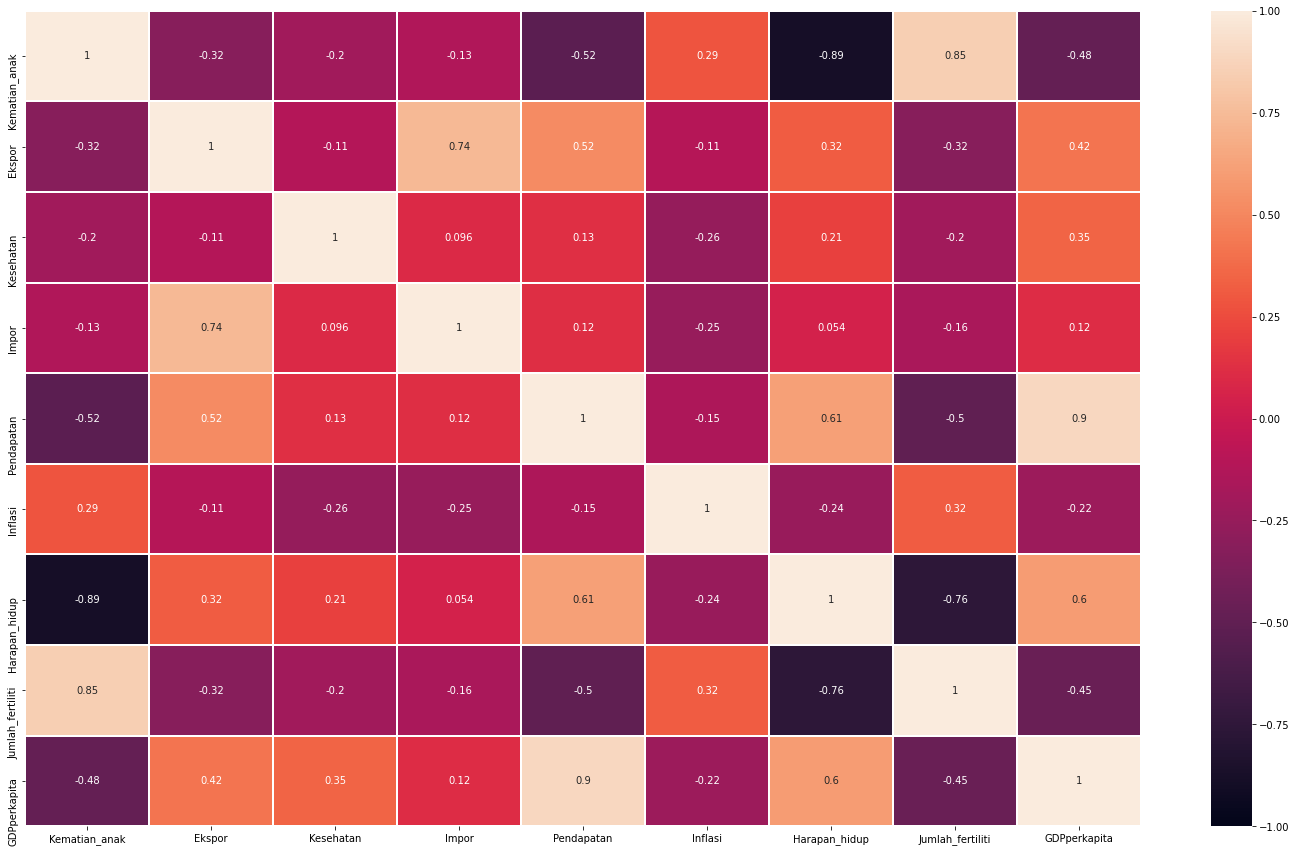

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1 , vmax=1, annot=True, linewidths=1)

> **Dropping Useless Column**
*   Memilih kolom yang diperlukan dalam proses
*   Kolom tersebut diambil dari hasil analisis pada table korelasi antar kolom
*   Kolom tersebut diambil berdasarkan yang memiliki nilai korelasi terbesar

In [ ]:
df_new = df[['Negara','Pendapatan','GDPperkapita','Harapan_hidup','Kematian_anak']]
df_new

,Negara,Pendapatan,GDPperkapita,Harapan_hidup,Kematian_anak
0,Afghanistan,1610.0,553.0,56.2,90.2
1,Albania,9930.0,4090.0,76.3,16.6
2,Algeria,12900.0,4460.0,76.5,27.3
3,Angola,5900.0,3530.0,60.1,119.0
4,Antigua and Barbuda,19100.0,12200.0,76.8,10.3
...,...,...,...,...,...
162,Vanuatu,2950.0,2970.0,63.0,29.2
163,Venezuela,16500.0,13500.0,75.4,17.1
164,Vietnam,4490.0,1310.0,73.1,23.3
165,Yemen,4480.0,1310.0,67.5,56.3


> **Checking Outliers**
*   Menampilkan apakah ada outlier atau tidak

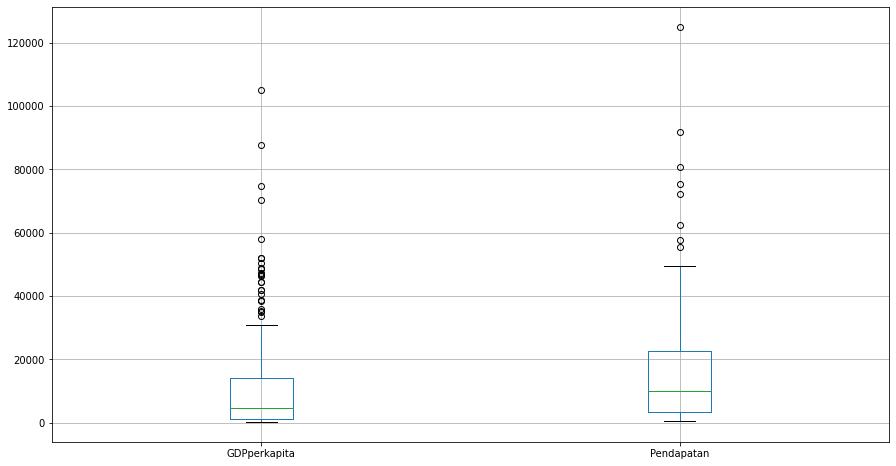

In [ ]:
plt.figure(figsize=(15,8))
df_new.boxplot(column=['GDPperkapita','Pendapatan'])

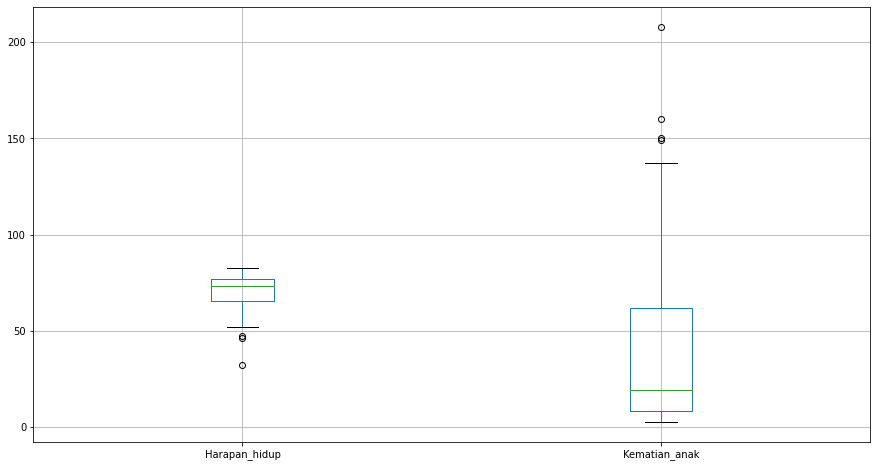

In [ ]:
plt.figure(figsize=(15,8))
df_new.boxplot(column=['Harapan_hidup','Kematian_anak'])

> **Handling Outliers**
*   Menghapus outlier dari kolom yang memiliki data abnormal

In [ ]:
def remove_outlier(df):
    Q1 = df_new.quantile(0.25)
    Q3 = df_new.quantile(0.75)
    IQR = Q3-Q1
    out = df_new[~((df_new<(Q1-(1.5*IQR))) | (df_new>(Q3+(1.5*IQR))))]
    return out

df_new = remove_outlier(df_new[['Pendapatan','GDPperkapita','Harapan_hidup','Kematian_anak']])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


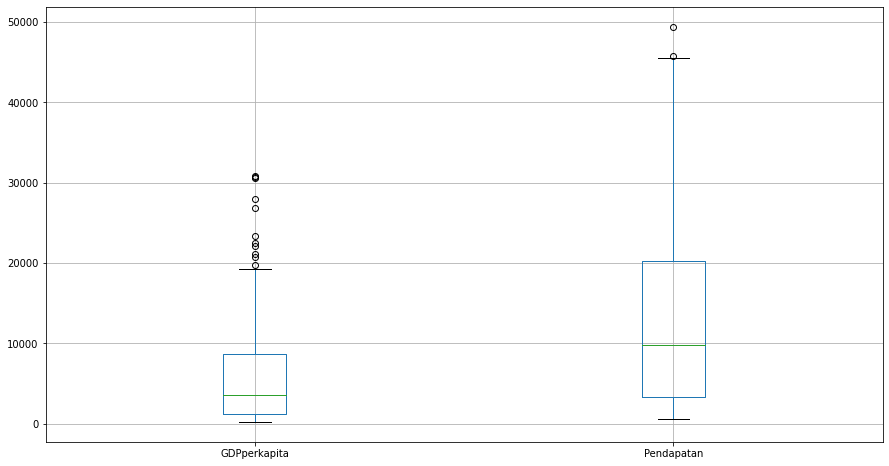

In [ ]:
plt.figure(figsize=(15,8))
df_new.boxplot(column=['GDPperkapita','Pendapatan'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


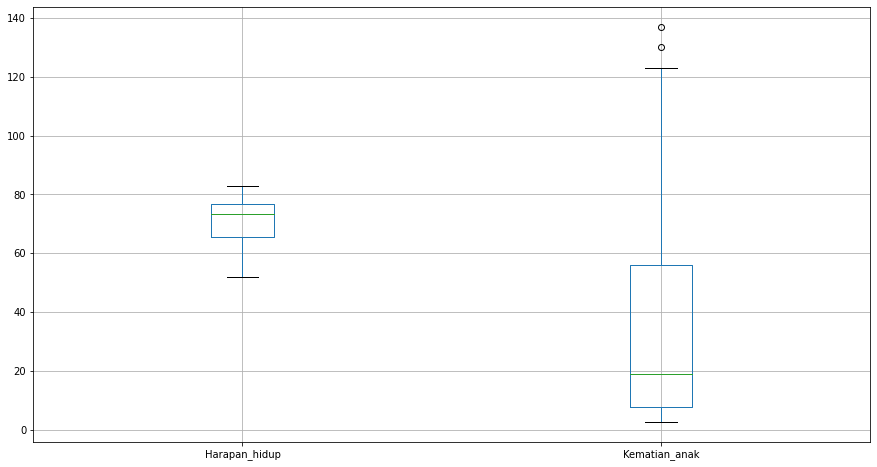

In [ ]:
plt.figure(figsize=(15,8))
df_new.boxplot(column=['Harapan_hidup','Kematian_anak'])

# Exploration

> *Plotting Data*
*   Menampilkan plot setiap nilai data yang berada pada kolom

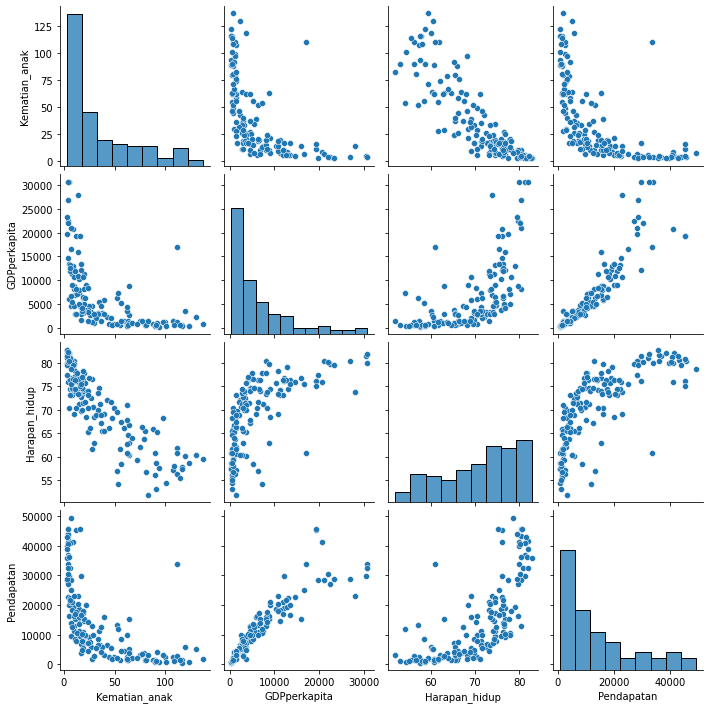

In [ ]:
sns.pairplot(data= df_new, vars=['Kematian_anak','GDPperkapita','Harapan_hidup','Pendapatan'])
plt.show()

> *Feature Engineering*
*   Untuk melakukan normalisasi

In [ ]:
def normalize(x):
    return (x - x.min())/(x.max() - x.min())

df_new['Pendapatan'] = df_new[['Pendapatan']].apply(normalize)
df_new['GDPperkapita'] = df_new[['GDPperkapita']].apply(normalize)
df_new['Harapan_hidup'] = df_new[['Harapan_hidup']].apply(normalize)
df_new['Kematian_anak'] = df_new[['Kematian_anak']].apply(normalize)

> **Variable Identification**
*   Menampilkan info tipe data setiap kolom

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Negara         167 non-null    object 
 1   Pendapatan     159 non-null    float64
 2   GDPperkapita   142 non-null    float64
 3   Harapan_hidup  164 non-null    float64
 4   Kematian_anak  163 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.6+ KB


> **Dealing With Missing**
*   Mengecek apakah ada kolom dan baris yang bernilai kosong atau tidak
*   Dropping duplicates/ delete missing value

In [ ]:
df_new.isnull().sum()

Negara            0
Pendapatan        8
GDPperkapita     25
Harapan_hidup     3
Kematian_anak     4
dtype: int64

In [ ]:
df_new.dropna(inplace = True)
df_new.isnull().sum()

Negara           0
Pendapatan       0
GDPperkapita     0
Harapan_hidup    0
Kematian_anak    0
dtype: int64

# Clustering

> **MEMBUAT FILE CSV**
*   File yang berisi kolom yang diperlukan

In [ ]:
df_new.to_csv('data_terbaru.csv', index=False)
data = pd.read_csv('data_terbaru.csv')
files.download('data_terbaru.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> **Proses Clustering**
*   Proses ini menggunakan K-Means
*   Proses ini menggunakan metode elbow

***Model 1 (Pendapatan dan GDPperkapita)***

In [ ]:
data1 = data[['Negara','Pendapatan','GDPperkapita']]
data1

,Negara,Pendapatan,GDPperkapita
0,Afghanistan,0.020516,0.010534
1,Albania,0.191039,0.126239
2,Algeria,0.251911,0.138343
3,Angola,0.108442,0.107920
4,Antigua and Barbuda,0.378984,0.391540
...,...,...,...
132,Vanuatu,0.047980,0.089601
133,Venezuela,0.325695,0.434067
134,Vietnam,0.079543,0.035297
135,Yemen,0.079338,0.035297


*   Mencari 'optimal number of cluster' berdasarkan nilai-nilai inersia



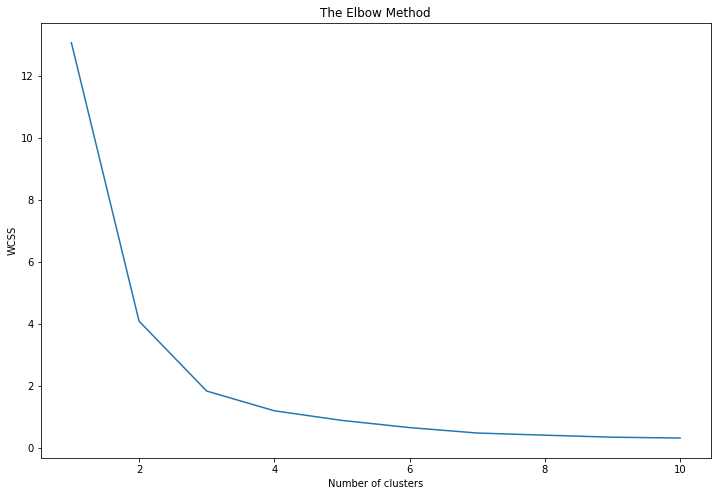

In [ ]:
wcss1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(data1[['Pendapatan','GDPperkapita']])
    wcss1.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(1,11),wcss1)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.set_title('The Elbow Method')
plt.show()

*   Melakukan proses eliminasi 'optimal number of cluster' 

In [ ]:
# n_cluster = 2
kmeans1 = KMeans(n_clusters=2,random_state=42).fit(data1[['Pendapatan','GDPperkapita']])
labels1 = kmeans1.labels_
data1['n_cluster = 2'] = labels1

# n_cluster = 3
kmeans2 = KMeans(n_clusters=3,random_state=42).fit(data1[['Pendapatan','GDPperkapita']])
labels2 = kmeans2.labels_
data1['n_cluster = 3'] = labels2

# n_cluster = 4
kmeans3 = KMeans(n_clusters=4,random_state=42).fit(data1[['Pendapatan','GDPperkapita']])
labels3 = kmeans3.labels_
data1['n_cluster = 4'] = labels3

# Pengecekan number of clustering yang memiliki score paling besar
print('k = 2 :',silhouette_score(data1[['Pendapatan','GDPperkapita']],labels1))
print('k = 3 :',silhouette_score(data1[['Pendapatan','GDPperkapita']],labels2))
print('k = 4 :',silhouette_score(data1[['Pendapatan','GDPperkapita']],labels3))

k = 2 : 0.6523009957201145
k = 3 : 0.608203189183546
k = 4 : 0.565769136130431


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.




*   Melakukan proses visualisasi data



In [ ]:
data1 = data1.drop(columns=['n_cluster = 3', 'n_cluster = 4'])
data1

,Negara,Pendapatan,GDPperkapita,n_cluster = 2
0,Afghanistan,0.020516,0.010534,1
1,Albania,0.191039,0.126239,1
2,Algeria,0.251911,0.138343,1
3,Angola,0.108442,0.107920,1
4,Antigua and Barbuda,0.378984,0.391540,0
...,...,...,...,...
132,Vanuatu,0.047980,0.089601,1
133,Venezuela,0.325695,0.434067,0
134,Vietnam,0.079543,0.035297,1
135,Yemen,0.079338,0.035297,1


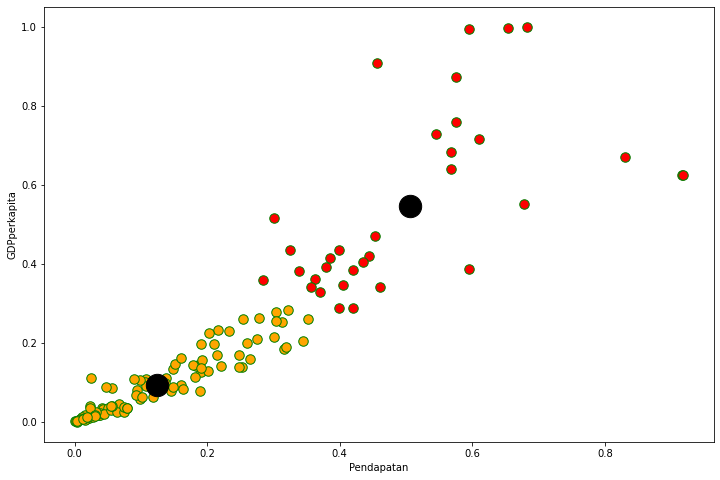

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data1['Pendapatan'][data1['n_cluster = 2'] == 0],data1['GDPperkapita'][data1['n_cluster = 2'] == 0],c='red',s=90,edgecolor='green')
ax.scatter(data1['Pendapatan'][data1['n_cluster = 2'] == 1],data1['GDPperkapita'][data1['n_cluster = 2'] == 1],c='orange',s=90,edgecolor='green')
ax.set_xlabel('Pendapatan')
ax.set_ylabel('GDPperkapita')
centers = kmeans1.cluster_centers_
ax.scatter(centers[:,0],centers[:,1],c='black',s=500)
plt.show()

***Model 2 (Kematian Anak dan Harapan Hidup)***

In [ ]:
data2 = data[['Negara', 'Kematian_anak', 'Harapan_hidup']]
data2

,Negara,Kematian_anak,Harapan_hidup
0,Afghanistan,0.651786,0.136364
1,Albania,0.104167,0.788961
2,Algeria,0.183780,0.795455
3,Angola,0.866071,0.262987
4,Antigua and Barbuda,0.057292,0.805195
...,...,...,...
132,Vanuatu,0.197917,0.357143
133,Venezuela,0.107887,0.759740
134,Vietnam,0.154018,0.685065
135,Yemen,0.399554,0.503247


*   Mencari 'optimal number of cluster' berdasarkan nilai-nilai inersia

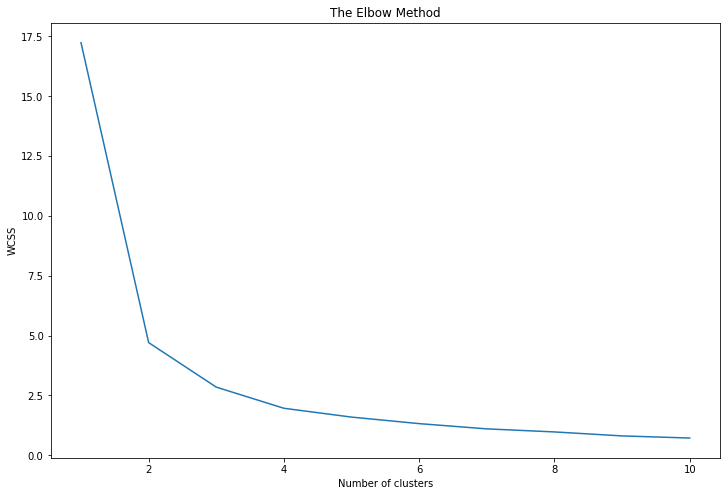

In [ ]:
wcss2 = []
for i in range(1,11):
    kmeans11 = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans11.fit(data2[['Kematian_anak','Harapan_hidup']])
    wcss2.append(kmeans11.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(range(1,11),wcss2)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.set_title('The Elbow Method')
plt.show()

*   Melakukan proses eliminasi 'optimal number of cluster' 

In [ ]:
# n_clustering = 2
kmeans4 = KMeans(n_clusters=2,random_state=42).fit(data2[['Kematian_anak','Harapan_hidup']])
labels4= kmeans4.labels_
data2['n_cluster = 2'] = labels4

# n_clustering = 3
kmeans5 = KMeans(n_clusters=3,random_state=42).fit(data2[['Kematian_anak','Harapan_hidup']])
labels5= kmeans5.labels_
data2['n_cluster = 3'] = labels5

# n_clustering = 4
kmeans6 = KMeans(n_clusters=4,random_state=42).fit(data2[['Kematian_anak','Harapan_hidup']])
labels6= kmeans6.labels_
data2['n_cluster = 4'] = labels6

# Pengecekan number of clustering yang memiliki score paling besar
print('k = 2 :',silhouette_score(data2[['Kematian_anak', 'Harapan_hidup']],labels4))
print('k = 3 :',silhouette_score(data2[['Kematian_anak', 'Harapan_hidup']],labels5))
print('k = 4 :',silhouette_score(data2[['Kematian_anak', 'Harapan_hidup']],labels6))

k = 2 : 0.6315406283848367
k = 3 : 0.5370572352975652
k = 4 : 0.47639644284863786


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


*   Melakukan proses visualisasi data

In [ ]:
data2 = data2.drop(columns=['n_cluster = 3', 'n_cluster = 4'])
data2

,Negara,Kematian_anak,Harapan_hidup,n_cluster = 2
0,Afghanistan,0.651786,0.136364,0
1,Albania,0.104167,0.788961,1
2,Algeria,0.183780,0.795455,1
3,Angola,0.866071,0.262987,0
4,Antigua and Barbuda,0.057292,0.805195,1
...,...,...,...,...
132,Vanuatu,0.197917,0.357143,1
133,Venezuela,0.107887,0.759740,1
134,Vietnam,0.154018,0.685065,1
135,Yemen,0.399554,0.503247,0


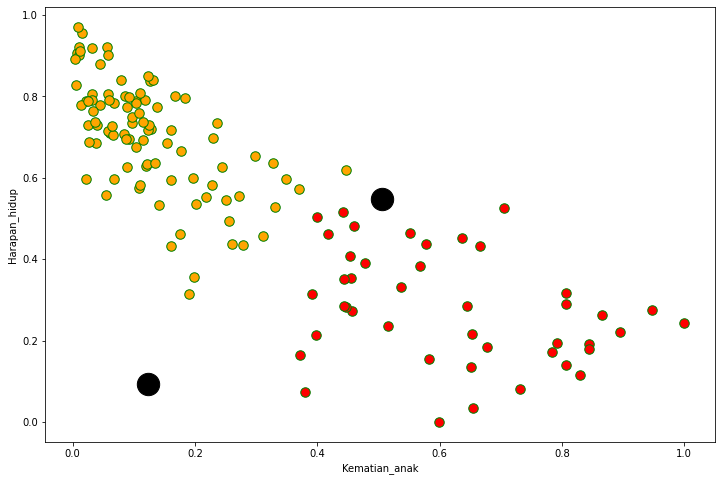

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data2['Kematian_anak'][data2['n_cluster = 2'] == 0],data2['Harapan_hidup'][data2['n_cluster = 2'] == 0],c='red',s=90,edgecolor='green')
ax.scatter(data2['Kematian_anak'][data2['n_cluster = 2'] == 1],data2['Harapan_hidup'][data2['n_cluster = 2'] == 1],c='orange',s=90,edgecolor='green')
ax.set_xlabel('Kematian_anak')
ax.set_ylabel('Harapan_hidup')
centers = kmeans1.cluster_centers_
ax.scatter(centers[:,0],centers[:,1],c='black',s=500)
plt.show()

***PROSES MENGKATEGORIKAN***

In [ ]:
hasil1 = data1[data1['n_cluster = 2'].values == 1]
hasil2 = data2[data2['n_cluster = 2'].values == 1]
hasil = pd.merge(hasil1, hasil2, on='Negara', how='inner')
hasil

,Negara,Pendapatan,GDPperkapita,n_cluster = 2_x,Kematian_anak,Harapan_hidup,n_cluster = 2_y
0,Albania,0.191039,0.126239,1,0.104167,0.788961,1
1,Algeria,0.251911,0.138343,1,0.183780,0.795455,1
2,Armenia,0.124839,0.097779,1,0.115327,0.691558,1
3,Azerbaijan,0.315448,0.183487,1,0.272321,0.555195,1
4,Bangladesh,0.037527,0.017240,1,0.348214,0.597403,1
...,...,...,...,...,...,...,...
56,Tunisia,0.200672,0.127875,1,0.110119,0.808442,1
57,Ukraine,0.147794,0.089601,1,0.067708,0.597403,1
58,Uzbekistan,0.074419,0.037587,1,0.250744,0.545455,1
59,Vanuatu,0.047980,0.089601,1,0.197917,0.357143,1


# LOAD DATA

In [ ]:
## Ascending berdasarkan pendapatan (Menentukan pendapatan lebih kecil)
load1 = hasil.sort_values(by=['Pendapatan'], ignore_index=True)
load1['Rank Pendapatan'] = load1.index + 1
load1

,Negara,Pendapatan,GDPperkapita,n_cluster = 2_x,Kematian_anak,Harapan_hidup,n_cluster = 2_y,Rank Pendapatan
0,Solomon Islands,0.024000,0.034643,1,0.189732,0.314935,1,1
1,Timor-Leste,0.025435,0.110210,1,0.446429,0.620130,1,2
2,Nepal,0.028304,0.011809,1,0.330357,0.529221,1,3
3,Tajikistan,0.030764,0.016585,1,0.370536,0.571429,1,4
4,Bangladesh,0.037527,0.017240,1,0.348214,0.597403,1,5
...,...,...,...,...,...,...,...,...
56,Azerbaijan,0.315448,0.183487,1,0.272321,0.555195,1,57
57,Belarus,0.319547,0.189702,1,0.021577,0.597403,1,58
58,Lebanon,0.321596,0.282279,1,0.057292,0.902597,1,59
59,Iran,0.344141,0.206058,1,0.124256,0.730519,1,60


In [ ]:
## Descending berdasarkan kematian anak (Menentukan kematian terbesar)
load2 = hasil.sort_values(by=['Kematian_anak'], ascending=False, ignore_index=True)
load2['Rank Kematian anak'] = load2.index + 1
load2

,Negara,Pendapatan,GDPperkapita,n_cluster = 2_x,Kematian_anak,Harapan_hidup,n_cluster = 2_y,Rank Kematian anak
0,Timor-Leste,0.025435,0.110210,1,0.446429,0.620130,1,1
1,Tajikistan,0.030764,0.016585,1,0.370536,0.571429,1,2
2,Bangladesh,0.037527,0.017240,1,0.348214,0.597403,1,3
3,Nepal,0.028304,0.011809,1,0.330357,0.529221,1,4
4,Bolivia,0.098399,0.057215,1,0.327381,0.636364,1,5
...,...,...,...,...,...,...,...,...
56,Costa Rica,0.253961,0.260689,1,0.056548,0.922078,1,57
57,Serbia,0.247812,0.169420,1,0.037202,0.737013,1,58
58,Bosnia and Herzegovina,0.186735,0.143250,1,0.031994,0.805195,1,59
59,Montenegro,0.274456,0.210965,1,0.031250,0.792208,1,60


In [ ]:
## Ascending berdasarkan harapan hidup (Menentukan harapan hidup lebih kecil)
load3 = hasil.sort_values(by=['Harapan_hidup'], ignore_index=True)
load3['Rank Harapan hidup'] = load3.index + 1
load3

,Negara,Pendapatan,GDPperkapita,n_cluster = 2_x,Kematian_anak,Harapan_hidup,n_cluster = 2_y,Rank Harapan hidup
0,Solomon Islands,0.024000,0.034643,1,0.189732,0.314935,1,1
1,Vanuatu,0.047980,0.089601,1,0.197917,0.357143,1,2
2,Fiji,0.138161,0.111845,1,0.159970,0.431818,1,3
3,"Micronesia, Fed. Sts.",0.055973,0.086002,1,0.278274,0.435065,1,4
4,Guyana,0.107212,0.091890,1,0.260417,0.438312,1,5
...,...,...,...,...,...,...,...,...
56,Panama,0.303150,0.256763,1,0.127232,0.837662,1,57
57,Peru,0.191654,0.156662,1,0.131696,0.840909,1,58
58,Maldives,0.202722,0.224705,1,0.078869,0.840909,1,59
59,Lebanon,0.321596,0.282279,1,0.057292,0.902597,1,60


In [ ]:
dataset = load1[['Negara', 'Rank Pendapatan']]
dataset1 = load2[['Negara', 'Rank Kematian anak']]
dataset2 = load3[['Negara', 'Rank Harapan hidup']]

gabungan = pd.merge(dataset, dataset1, on='Negara', how='inner')
gabungan2 = pd.merge(gabungan, dataset2, on='Negara', how='inner')
gabungan2

,Negara,Rank Pendapatan,Rank Kematian anak,Rank Harapan hidup
0,Solomon Islands,1,21,1
1,Timor-Leste,2,1,23
2,Nepal,3,4,9
3,Tajikistan,4,2,14
4,Bangladesh,5,3,21
...,...,...,...,...
56,Azerbaijan,57,9,13
57,Belarus,58,61,19
58,Lebanon,59,56,60
59,Iran,60,34,43


In [ ]:
gabungan2.to_csv('data_hasil.csv', index=False)
files.download('data_hasil.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
gabungan2.head(31)

,Negara,Rank Pendapatan,Rank Kematian anak,Rank Harapan hidup
0,Solomon Islands,1,21,1
1,Timor-Leste,2,1,23
2,Nepal,3,4,9
3,Tajikistan,4,2,14
4,Bangladesh,5,3,21
5,Cambodia,6,6,6
6,Kyrgyz Republic,7,18,10
7,Vanuatu,8,19,2
8,"Micronesia, Fed. Sts.",9,8,4
9,Moldova,10,43,15


In [ ]:
gabungan2.tail(30)

,Negara,Rank Pendapatan,Rank Kematian anak,Rank Harapan hidup
31,Sri Lanka,32,53,42
32,Ecuador,33,25,54
33,Jordan,34,30,48
34,China,35,46,45
35,Bosnia and Herzegovina,36,59,55
36,Egypt,37,20,22
37,St. Vincent and the Grenadines,38,31,29
38,Albania,39,44,49
39,Peru,40,32,58
40,Tunisia,41,41,56
